---
---

<h1><center><ins>Exercise Sheet 6</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log


## Exercise 1 - Radioactive decay

Radioactive decay is the process by which an unstable atomic nucleus loses energy by radiation. The fundamental law of radioactive decay is based on the fact that the decay, i.e. the transition of a parent nucleus to a daughter nucleus is a purely statistical process. The disintegration (decay) probability is a fundamental property of an atomic nucleus and remains equal in time. Mathematically this law is expressed as: 

$$ \frac{d N}{dt} = - \lambda N \ , $$

where $N$ is the number of radioactive nuclei, $dN/dt$ the variation of this number per unit of time, and $\lambda$ is thus the probability of decay per nucleus per unit of time. A more intuitive representation of exponential decay is the time required for the decaying quantity to fall to one half of its initial value. This time, $t_{1/2}$, is called "half-life", and can be written in terms of the decay constant as:

$$ t_{1/2} = \frac{\ln(2)}{\lambda} \ . $$

Let's consider here Carbon-14, for which the decay constant is $\lambda \sim 1.21 \times 10^{-4}$ yr$^{-1}$, and which has a half-life $t_{1/2} \sim 5728$ yr. Its presence in organic materials is the basis of the radiocarbon dating method to date archaeological, geological and hydrogeological samples.

**(A)** Implement _**your own version**_ of the **Euler and Runge Kutta (order 2) algorithms**, and solve the differential equation above by using these methods. Compare the results you obtain to the analytic solution, which can be calculated as:

$$ N = N_0 \exp(-\lambda t) \ ,$$

where $N_0$ is the initial amount of the nuclei $[$i.e., $N(t = 0) = N_0]$.

**(B)** Compute your solution for a sufficient number of steps so that you can determine the **half-life** of Carbon-14. Pay attention to the size of the time-step you are using, and discuss your results when using different time-steps. Which method recovers a value of the half-life that is closer to the real one?

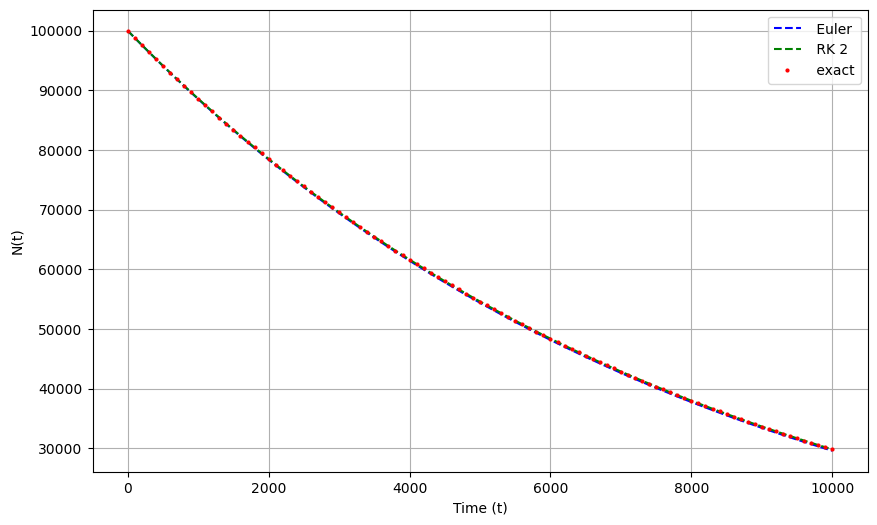

Halflife
########
Exact solution:  5728.489095536738
Euler:  5693.7969594098
RK2:  5728.753883027724


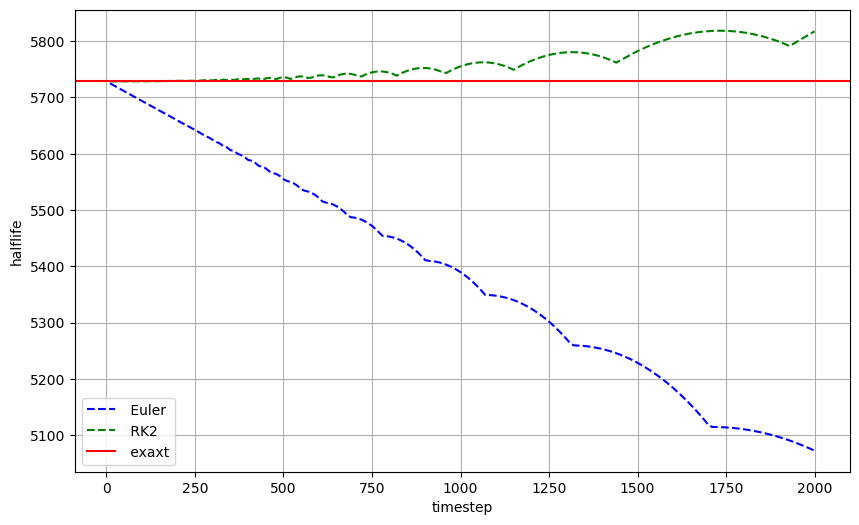

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

#Zerfallskonstante
lamb = 1.21 * 10**(-4)

#analytical halflife
halflife = log(2)/lamb

#Euler-Method
def euler(f, y0, t_max, h):
    """
    Euler-method
    Parameter:
        f: righthand side of the equation, f(y, t)
        y0: initial value
        t_max: integration time
        h: time step
    Return:
        t: timepoints of y
        y: solution
    """
#How many steps are needed from 0 to reach t_max
#Number of Euler steps
    N_total = int(t_max / h)

#Create array with all times the solution is evaluated    
    t = np.linspace(0.0, N_total * h, N_total + 1)

#Create an array for the solution, fill it with zeros    
    y = np.zeros(N_total + 1)

#Start of Euler with initial values   
    y[0] = y0

    for i in range(N_total):
        y[i+1] = y[i] + h * f(y[i], t[i])
   
    return t, y

#Runge-Kutta 2. Ordnung (midpoint method)
def rk2(f, y0, t_max, h):
    """
    Runge-Kutte Order 2
    Parameter:
        f: righthand side of the equation, f(y, t)
        y0: initial value
        t_max: integration time
        h: time step
    Return:
        t: timepoints of y
        y: solution
    
    """
#How many steps are needed to reach t_max
    N_total = int(t_max / h)

#Create array with all times the solution is evaluated    
    t = np.linspace(0.0, N_total * h, N_total + 1)

#Create an array for the solution, fill it with zeros    
    y = np.zeros(N_total + 1)

#Start of Runge Kutta
    y[0] = y0

    for i in range(N_total):
        k1 = f(y[i], t[i]) #Steigung am Anfang des  Intervalls 
        k2 = f(y[i] + 0.5 * h * k1, t[i] + 0.5 * h) #Steigung in der Mitte des Intervalls 
        y[i+1] = y[i] + h * k2
  
    return t, y

#right hand side of the equation
def rhs_decay(N,t):
    return -lamb*N

# Exact solution for comparison
def exact_solution(N0,lamb,t):
    return N0*np.exp(-lamb*t)

######
#Main program

#initial parameters
N0=100000
t_max=10000
h=100

#Exercise 1A: numerical solution with Euler and RK2 and comparison to exact solution

t,N_euler=euler(rhs_decay,N0,t_max,h)
t,N_rk2=rk2(rhs_decay,N0,t_max,h)
N_exact=exact_solution(N0,lamb,t)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, N_euler, 'b--', label=' Euler')
plt.plot(t, N_rk2, 'g--', label=' RK 2')
plt.plot(t, N_exact, 'r o', markersize=2, label=' exact')
plt.xlabel('Time (t)',fontsize = 10)
plt.ylabel('N(t)',fontsize = 10)
plt.legend(fontsize = 10)
plt.grid()
plt.show()

#Exercise 1b: calculate halflife

def numerical_halflife(t, N, N0):
    half = 0.5 * N0
#find entries in array, where N is below N0/2
    below = np.where(N <= half)

#j: first entry, where N is below n=/2
    
    j=below[0][0]
    
# linear interpolation between (t[j-1], N[j-1]) and (t[j], N[j])
    t1, t2 = t[j-1], t[j]
    N1, N2 = N[j-1], N[j]
    return t1 + (half - N1) * (t2 - t1) / (N2 - N1)


t_euler=numerical_halflife(t,N_euler,N0)
t_rk2=numerical_halflife(t,N_rk2,N0)

print("Halflife")
print("########")
print("Exact solution: ", halflife)
print("Euler: ", t_euler)
print("RK2: ",t_rk2)


#Repeat all of the above for different time steps h

h0=10
N_h=200

h=0
xp=[]
y1=[]
y2=[]

for i in range(N_h):
    h=h+h0

    t,N_euler=euler(rhs_decay,N0,t_max,h)
    t,N_rk2=rk2(rhs_decay,N0,t_max,h)
    t_euler=numerical_halflife(t,N_euler,N0)
    t_rk2=numerical_halflife(t,N_rk2,N0)

    xp+=[h]
    y1+=[t_euler]
    y2+=[t_rk2]
    
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(xp, y1, 'b--', label=' Euler')
plt.plot(xp, y2, 'g--', label=' RK2')
plt.axhline(y=halflife, color='r', label=' exaxt')
plt.xlabel('timestep',fontsize = 10)
plt.ylabel('halflife',fontsize = 10)
plt.legend(fontsize = 10)
plt.grid()
plt.show()


## Exercise 2 - The motion of a pendulum

The differential equation describing the motion of a simple pendulum of length $l$ is

$$ \frac{d^2 \theta}{dt^2} = - \frac{g}{l} \sin(\theta) \ , $$

where $g$ is the local acceleration of gravity (on Earth, $g = 9.8$ m/s$^2$). For this exercise, consider $l = 10$ m. Here we will consider the simple case in which the maximal displacement of the pendulum is small, so that we can use the approximation $\sin(\theta) \approx \theta$ and consider the following, simplified, equation:

$$ \frac{d^2 \theta}{dt^2} = - \frac{g}{l} \theta \ . $$

This equation can be solved analytically, giving the following expression for $\theta(t)$:

$$ \theta(t) = \theta_0 \cos \left(\sqrt{\frac{g}{l}} \, t \right) \ .$$

**(A)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically by implementing _**your own version**_ of the **Euler method**. Consider that at a time $t = 0$ the pendulum is at $\theta = 0.1$ radians, and it is not moving. 

**(B)** What is the displacement ($\theta$) of the pendulum at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s in your ODE integrator? How different is the value you obtain from the true one (calculated with the above equation)? How small should the time step be, if you want to have a discrepancy of at most 0.01 in the value of $\theta(t = 20$ s$)$?

**(C)** Implement _**your own version**_ of the **Euler-Cromer and Runge Kutta (order 4) algorithms**, and solve the differential equation again by using these methods. How big is the discrepancy from the real solution for these methods, at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s?

## 2A: Rewrite equations:

$$
\theta' = \omega,
\qquad
\omega' = -\frac{g}{l}\,\theta.
$$


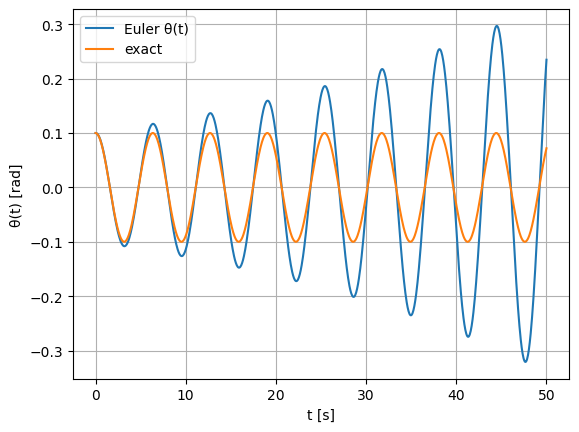



 Excercise 2C
θ_num(20s) = 0.06426593062605182
θ_true(20s) = 0.05821434287267862
Fehler = 0.4662926123765368
h =   0.5, Error = 7.09803
h =   0.2, Error = 0.46629
h =   0.1, Error = 0.10969
h =  0.05, Error = 0.03888
h =  0.02, Error = 0.01286
h =  0.01, Error = 0.00605


 Excercise 2C
Result at t = 20 s, h = 0.2:
Euler-Cromer: θ_num(20) = 0.047270360586734964  → Error = 0.010943982285943656
RK4:          θ_num(20) = 0.05823224356750156  → Error = 1.7900694822943486e-05


In [69]:
import numpy as np
import matplotlib.pyplot as plt

#Right hand sides of ODEs

def pendulum_rhs(y, t):
    theta = y[0]
    omega = y[1]
    return np.array([omega, -(g/l)*theta])


def euler(f, y0, t_max, h):
    """
    Euler Method (now in 2D (Vectors))
    y[0] = theta, y[1] = omega
    Parameter:
        f: righthand side of the equation, f(y, t)
        y0: initial value
        t_max: integration time
        h: time step
    Return:
        t: timepoints of y
        y: solution
    """
#How many steps are needed to reach t_max
    N_total = int(t_max / h)

#Create array with all times the solution is evaluated    
    t = np.linspace(0.0, N_total * h, N_total + 1)

#Create an array for the solution, fill it with zeros  
#(modified from Ex. 1A for 2D)    
    y = np.zeros((N_total + 1, len(y0)))

#Start of Euler    
    y[0] = y0

    for i in range(N_total):
        y[i+1] = y[i] + h * f(y[i], t[i])
   
    return t, y

def euler_cromer(f, y0, t_max, h):
    """
    Euler-Cromer-method
    y[0] = theta, y[1] = omega
    same parameters as for Euler
    """
    N_total = int(t_max / h)
    t = np.linspace(0.0, N_total * h, N_total + 1)
    y = np.zeros((N_total + 1, len(y0)))
    y[0] = y0

    for i in range(N_total):
        rhs = f(y[i], t[i])          # rhs[0] = omega, rhs[1] = -g/l * theta
        omega_new = y[i, 1] + h * rhs[1]    # omega must be evaluated first
        theta_new = y[i, 0] + h * omega_new 
        y[i+1, 0] = theta_new
        y[i+1, 1] = omega_new

    return t, y

def rk4(f, y0, t_max, h):
    """
    Runge-Kutta order 4
    same parameters as for Euler
    """
    N_total = int(t_max / h)
    t = np.linspace(0.0, N_total * h, N_total + 1)
    y = np.zeros((N_total + 1, len(y0)))
    y[0] = y0

    for i in range(N_total):
        ti = t[i]
        yi = y[i]

        k1 = f(yi, ti)
        k2 = f(yi + 0.5*h*k1, ti + 0.5*h)
        k3 = f(yi + 0.5*h*k2, ti + 0.5*h)
        k4 = f(yi + h*k3,     ti + h)

        y[i+1] = yi + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

    return t, y

def theta_analytic(t):
    return theta0 * np.cos(freq * t)

# initial conditions

g, l = 9.8, 10.0  
# frequency of pendulum
freq = np.sqrt(g / l)
theta0 = 0.1       # initial angle at t=0s
omega0 = 0.0       
y0 = np.array([theta0, omega0]) 

t, y = euler(pendulum_rhs, y0, t_max=50, h=0.05)

theta = y[:,0]
omega = y[:,1]

# analytical solution
theta_exact = theta0 * np.cos(freq * t)

# ---- Plot ----
plt.plot(t, theta, label="Euler θ(t)")
plt.plot(t, theta_exact, label="exact")
plt.xlabel("t [s]")
plt.ylabel("θ(t) [rad]")
plt.legend()
plt.grid(True)
plt.show()


#Excercise 2B:
#caluclate displacement at t=20s with timestep h=0,2

t, y = euler(pendulum_rhs, y0, t_max=50, h=0.2)

#get index of entry where t=20s
index_20 = np.where(t == 20)[0][0]
#lookup value for theta at that time
theta_euler20 = y[index_20, 0]   
#calculate exact solution at t=20s and error
theta_true_20 = theta_analytic(20)
error = abs(theta_euler20 - theta_true_20)

#Print results
print("\n\n Excercise 2C")
print("θ_num(20s) =", theta_num_20)
print("θ_true(20s) =", theta_true_20)
print("Fehler =", error)

#Array of different time steps to find one where the error is small enough
hs = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01]

#calculate  
for h in hs:
    t, y = euler(pendulum_rhs, np.array([theta0, omega0]), t_max=20, h=h)
    index_20 = np.where(t == 20)[0][0]
    theta_euler20 = y[index_20, 0]   
    error = abs(theta_euler20 - theta_analytic(20))
    print(f"h = {h:5}, Error = {error:.5f}")

##Excercise 2C:
#compare different methods for timestep h=0.2 at t=20s

h_test = 0.2

# Euler-Cromer
t_ec, y_ec = euler_cromer(pendulum_rhs, y0, t_max=20, h=h_test)
index_20 = np.where(t_ec == 20)[0][0]
theta_ec_20 = y_ec[index_20, 0]
error_ec = abs(theta_ec_20 - theta_analytic(20))

# RK4
t_rk, y_rk = rk4(pendulum_rhs, y0, t_max=20, h=h_test)
theta_rk_20 = y_rk[index_20, 0]
error_rk = abs(theta_rk_20 - theta_analytic(20))

print("\n\n Excercise 2C")
print("Result at t = 20 s, h = 0.2:")
print("Euler-Cromer: θ_num(20) =", theta_ec_20, " → Error =", error_ec)
print("RK4:          θ_num(20) =", theta_rk_20, " → Error =", error_rk)

## Exercise 3 - Motion of a mass attached to a spring

The differential equation describing the motion of a particle attached to a spring can be obtained by putting together Newton's 2nd law and Hooke's law, and it can be written as:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Choose some reasonable values for $k$ and $m$, define the initial conditions of your problem, and compute the analytic solution of your specific system, considering that the general solution is given by:

$$ x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} \, t\right) + v_0 \sqrt{\frac{m}{k}} \sin \left(\sqrt{\frac{k}{m}} \, t\right) \ , $$

where $x_0$ and $v_0$ are the position and velocity of the particle at time $t = 0$.

**(B)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically _**by using one of the built-in python methods**_ (take a look at the available methods in the `scipy` package).

**(C)** Plot your solution and compare it to the analytical solution.

### (A) Choice for m and k

m=1 [kg]
k= 1[N/m]

with this choice the frequency $\omega=\sqrt{\frac{m}{k}}=1$ and the equations get simple: $$ \frac{d^2 x}{dt^2} = - x  $$

This choice is realistic; the period of oscillation of the mass of 1kg is $$T=\frac{2\pi}{\omega}=2\pi \approx 6.28s$$

The solution of $ \frac{d^2 x}{dt^2} = - x  $ can be obtained with the standard solution for a harmonic oscillator:

$$x(t)=A\cos(\omega t) + B \sin(\omega t)$$

for t=0:

$$x(0)= A = x_0$$
$$\dot{x}= B \omega$$

and $v_0=B\omega$ or $B=\frac{v_0}{\omega}$.

And thus (with $\omega=1$):

$$x(t)=x_0 \cos(t) + v_0 \sin(t)$$

### (B) Transformation to first order ODEs:

$$v(t)=\dot{x}(t)$$

or

$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=-\frac{k}{m}x$$



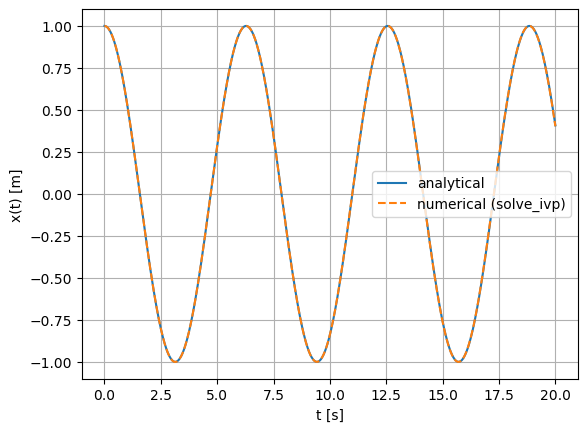

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------
# choice of parameters
# -----------------------
m = 1.0        # mass in kg
k = 1.0        # spring constat in N/m
omega = np.sqrt(k / m)

# initial conditions
x0 = 1.0       # initial displacement
v0 = 0.0       # initial velocity

# -----------------------
# system of equations in first order
# -----------------------

def ho_rhs(t, y):
    """
    y[0] = x, y[1] = v
    x' = v
    v' = -(k/m)*x
    """
    x, v = y
    dxdt = v
    dvdt = -(k / m) * x
    return [dxdt, dvdt]

# -----------------------
# analytical solution
# -----------------------

def x_analytic(t, x0, v0, omega, m, k):
    # x(t) = x0 cos(ω t) + v0 * sqrt(m/k) * sin(ω t)
    return x0 * np.cos(omega * t) + v0 * np.sqrt(m / k) * np.sin(omega * t)

#time interval
t_span = (0.0, 20.0)
#times at which equations are evaluated
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# numerical solution with solve_ivp (Runge-Kutta)
sol = solve_ivp(ho_rhs, t_span, [x0, v0], t_eval=t_eval)

t_num = sol.t
x_num = sol.y[0]

x_exact = x_analytic(t_num, x0, v0, omega, m, k)

# -----------------------
# Plot
# -----------------------

plt.figure()
plt.plot(t_num, x_exact, label="analytical")
plt.plot(t_num, x_num, "--", label="numerical (solve_ivp)")
plt.xlabel("t [s]")
plt.ylabel("x(t) [m]")
plt.grid(True)
plt.legend()
plt.show()